# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
 
    # Create endpoint URL with each city
    city_url = url + f"q={cities[i]}&units=imperial&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | mili
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | paragominas
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | rouissat
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | sittwe
Processing Record 14 of Set 1 | crane
Processing Record 15 of Set 1 | taltal
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | kristiansund
Processing Record 18 of Set 1 | yagry
City not found. Skipping...
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | guabiraba
Processing Record 21 of Set 1 | 'ohonua
City not found. Skipping...
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pisco,-13.7000,-76.2167,71.65,88,0,14.97,PE,1703991707
1,adamstown,-25.0660,-130.1015,72.97,79,82,15.99,PN,1703991418
2,ribeira grande,38.5167,-28.7000,55.78,76,75,4.00,PT,1703991505
3,port-aux-francais,-49.3500,70.2167,40.86,83,87,35.75,TF,1703991709
4,mili,6.0815,171.7350,82.78,81,94,14.03,MH,1703991709


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pisco,-13.7000,-76.2167,71.65,88,0,14.97,PE,1703991707
1,adamstown,-25.0660,-130.1015,72.97,79,82,15.99,PN,1703991418
2,ribeira grande,38.5167,-28.7000,55.78,76,75,4.00,PT,1703991505
3,port-aux-francais,-49.3500,70.2167,40.86,83,87,35.75,TF,1703991709
4,mili,6.0815,171.7350,82.78,81,94,14.03,MH,1703991709


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

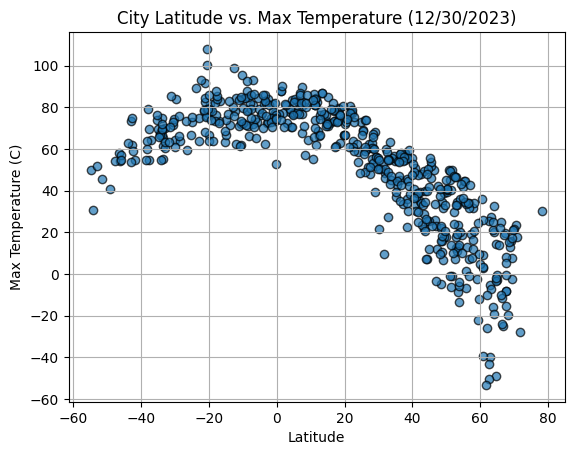

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (12/30/2023)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

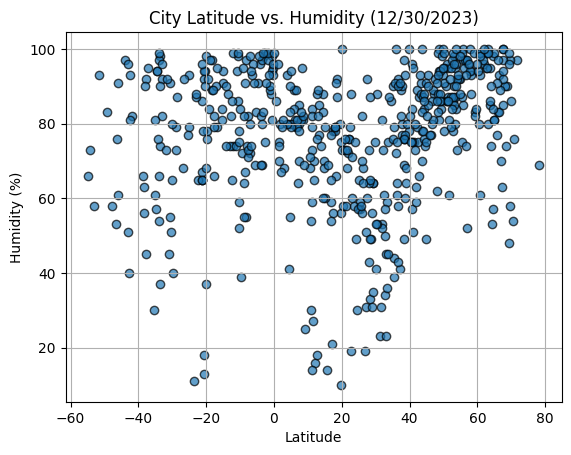

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (12/30/2023)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

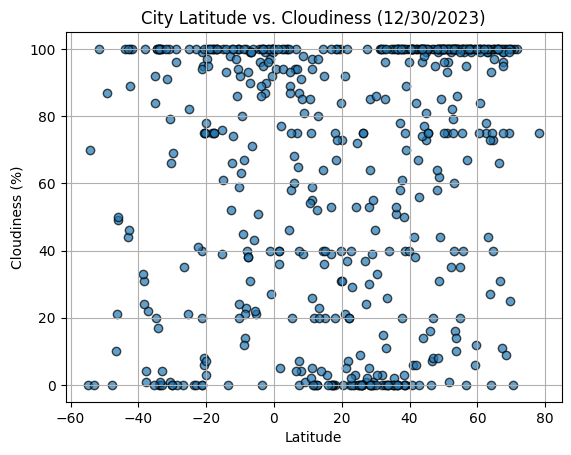

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (12/30/2023)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

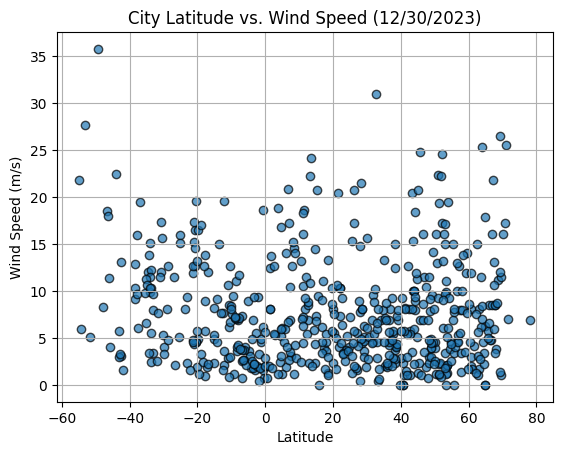

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (12/30/2023)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,line_eq,regress_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    print(max(x_values))
    print(max(y_values))
    plt.annotate(line_eq,xy=(min(x_values)+20,min(y_values)+20),fontsize=15,color="red")
    plt.scatter(x_values,y_values,c='b')
    plt.plot(x_values,regress_values,"r-")
    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ribeira grande,38.5167,-28.7000,55.78,76,75,4.00,PT,1703991505
4,mili,6.0815,171.7350,82.78,81,94,14.03,MH,1703991709
7,hawaiian paradise park,19.5933,-154.9731,74.88,80,100,10.36,US,1703991573
8,lihue,21.9789,-159.3672,78.04,72,7,7.38,US,1703991713
9,bethel,41.3712,-73.4140,39.02,75,44,8.23,US,1703991717


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pisco,-13.7000,-76.2167,71.65,88,0,14.97,PE,1703991707
1,adamstown,-25.0660,-130.1015,72.97,79,82,15.99,PN,1703991418
3,port-aux-francais,-49.3500,70.2167,40.86,83,87,35.75,TF,1703991709
5,puerto natales,-51.7236,-72.4875,45.63,93,100,5.06,CL,1703991531
6,paragominas,-2.9667,-47.4833,72.32,98,100,1.54,BR,1703991711


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7468394187123093
78.2186
90.37


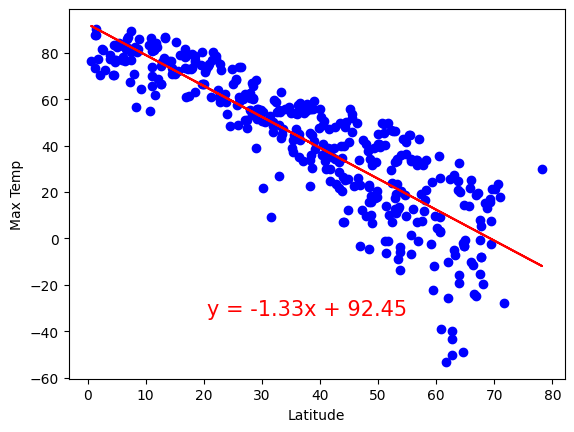

In [30]:
# Linear regression on Northern Hemisphere
line_eq = ''
regress_values = ''
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],line_eq,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


The r-squared is: 0.32805960723951755
-0.1303
107.96


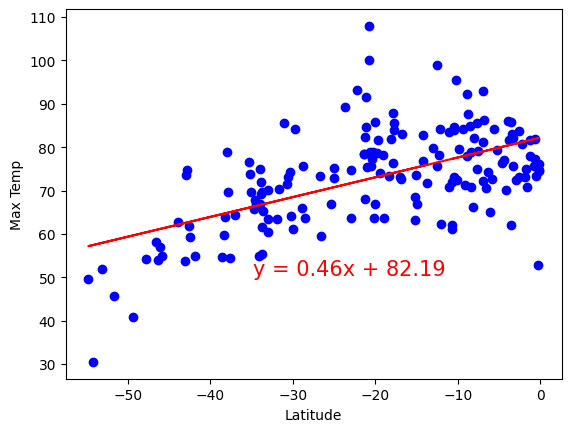

In [31]:
# Linear regression on Southern Hemisphere
line_eq = ''
regress_values = ''
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],line_eq,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** For the Northern hemisphere, there is a strong negative correlation between latitude and max temperature. This makes sense, as higher latitudes are closer to the north pole, which tends to be colder than the equator. For the Southern hemisphere, there was a moderate correlation between latitude and max temperature. This also makes sense because the latitudes that are more negative are closer to the south pole, which is colder than the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.15801379467251342
78.2186
100


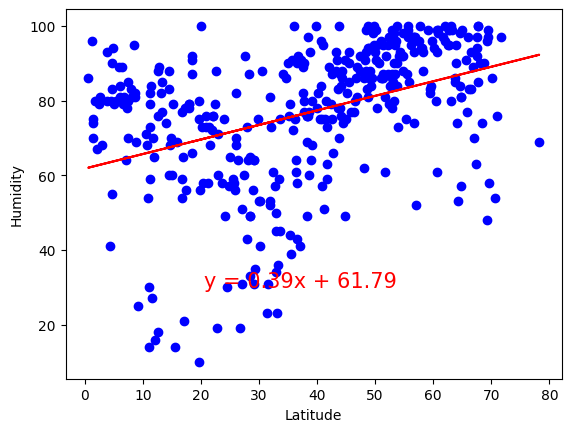

In [38]:
# Northern Hemisphere
line_eq = ''
regress_values = ''
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],line_eq,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-squared is: 0.07292257064418295
-0.1303
99


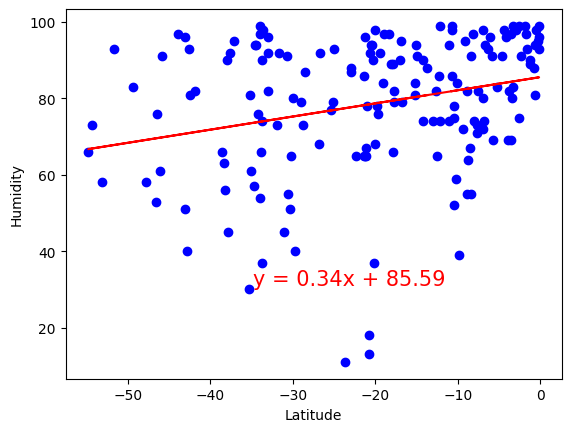

In [33]:
# Southern Hemisphere
line_eq = ''
regress_values = ''
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],line_eq,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** There was a weak correlation between humidity and latitude for both the Northern and Southern hemispheres. This makes sense because humidity isn't necessarily dependent on temperature or location, but rather on water supply.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11401224175310042
78.2186
100


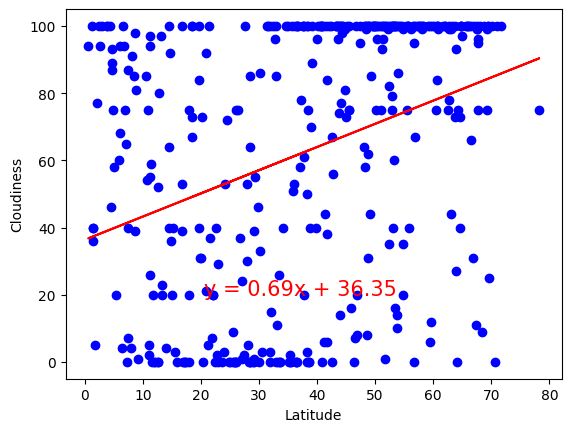

In [34]:
# Northern Hemisphere
line_eq = ''
regress_values = ''
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],line_eq,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-squared is: 0.0731568598489451
-0.1303
100


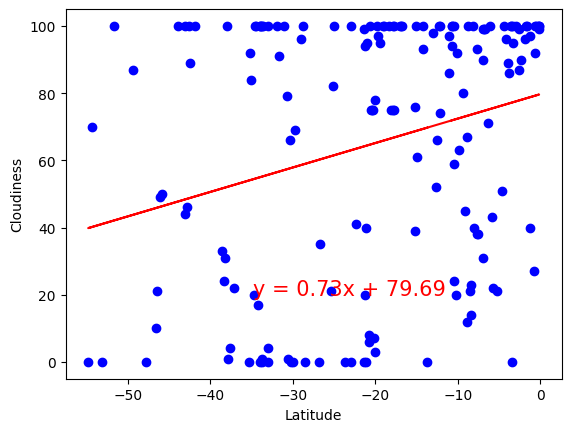

In [35]:
# Southern Hemisphere
line_eq = ''
regress_values = ''
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],line_eq,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** The correlation between cloudiness and latitude was weak for both the Northern and Southern hemispheres. This makes sense because cloud coverage is not dependent on location.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0005839523528864897
78.2186
30.96


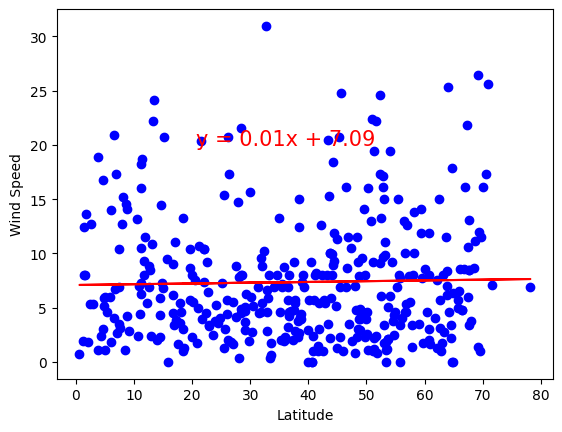

In [36]:
# Northern Hemisphere
line_eq = ''
regress_values = ''
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],line_eq,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-squared is: 0.1945700965677293
-0.1303
35.75


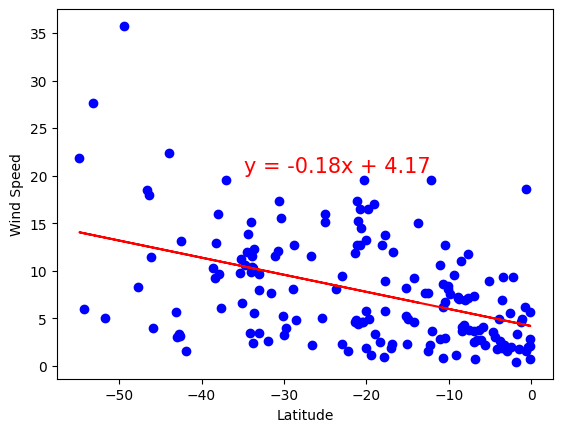

In [37]:
# Southern Hemisphere
line_eq = ''
regress_values = ''
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],line_eq,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The correlation between wind speed and latitude was weak for both the Northern and Southern hemispheres. This makes sense because wind is not dependent on location, but rather overall weather patterns.